<div style="border:2px solid black; padding:10px;">
    <h3>Nhóm 15</h3>
    <h1 style='color:red;text-align:center;font-size:30px'>Chủ đề: Phân tích về doanh thu phim<b></b></h1>
</div>


<h3>Danh sách thành viên</h3>
<li> Nguyễn Quốc Hưng - 21120464 </li>
<li> Đoàn Đức Hữu - 21120465 </li>
<li> Võ Minh Khuê - 21120486</li>
<li> Hồ Trọng Lễ - 21120494</li>

<h1 style='color:blue;text-align:center;font-size:30px'><b>Phần II</b></h1>

# Import thư viện

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import os
import re
import statistics
sns.set_theme()
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgray'})

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
import sys
sys.executable

'/home/hunglinux/miniconda3/envs/min_ds-env/bin/python'

## Đọc file 'processed_data' vào dataframe df

In [3]:
movies_df = pd.read_csv('./data/processed/processed_data.csv')
movies_df.head(10)

,title,domestic_revenue,world_revenue,distributor,opening_revenue,MPAA,genres,running_time,in_release,release_date
0,Batman Returns,162831698,266831698,Warner Bros.,45687711.0,PG-13,"Action,Crime,Fantasy",126.0,196.0,1992-06-19
1,Evolution,38345494,98376292,DreamWorks Distribution,13408351.0,PG-13,"Comedy,Sci-Fi",101.0,207.0,2001-06-08
2,Jumanji,100475249,100475249,Sony Pictures Entertainment (SPE),11084370.0,PG,"Adventure,Comedy,Family,Fantasy",104.0,383.0,1995-12-15
3,The American President,60079496,60079496,Sony Pictures Entertainment (SPE),10014558.0,PG-13,"Comedy,Drama,Romance",114.0,411.0,1995-11-17
4,Mulholland Drive,7220243,20117339,Universal Pictures,587591.0,R,"Drama,Mystery,Thriller",147.0,450.0,2001-10-08
5,Tombstone,56505065,56505065,Walt Disney Studios Motion Pictures,6454752.0,R,"Biography,Drama,History,Western",130.0,373.0,1993-12-24
6,Heart and Souls,16589540,16589540,Universal Pictures,4322250.0,PG-13,"Comedy,Drama,Fantasy,Romance",104.0,141.0,1993-08-13
7,The Phantom of the Opera,51268815,154648887,Warner Bros.,4001890.0,PG-13,"Drama,Musical,Romance,Thriller",143.0,375.0,2004-12-22
8,The Brady Bunch Movie,46576136,46576136,Paramount Pictures,14827066.0,PG-13,Comedy,90.0,318.0,1995-02-17
9,Teenage Mutant Ninja Turtles III,42273609,42273609,New Line Cinema,12419597.0,PG,"Action,Adventure,Comedy,Family,Fantasy,Sci-Fi",96.0,288.0,1993-03-19


### Vấn đề đặt ra 
- Làm thế nào việc phân loại MPAA ảnh hưởng đến doanh thu của một bộ phim? Nếu có, dự đoánh mức độ ảnh hưởng?

### Chuẩn bị dữ liệu và tiền xử lý

In [4]:
features = movies_df[['domestic_revenue', 'opening_revenue', 'world_revenue']]
target = movies_df['MPAA']

# Chuyển đổi nhãn về dạng số
le = LabelEncoder()
target_encoded = le.fit_transform(target)

Chia mô hình thành 2 tập: 
   - Tập dùng để huấn luyện
   - Tập dùng để kiểm tra và đánh giá độ chính xác của mô hình

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

Tiêu chuẩn hóa dữ liệu

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Triển khai mô hình

1. Random Forest Classifier

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rfc = rf_classifier.predict(X_test_scaled)

# Đánh giá mô hình
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc, zero_division=1)

2. K-Nearest Neighbors

In [8]:
kn_neighbors = KNeighborsClassifier()
kn_neighbors.fit(X_train_scaled, y_train)
y_pred_knn = kn_neighbors.predict(X_test_scaled)

# Đánh giá mô hình
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn, zero_division=1)

### Đánh giá mô hình

1. Random Forest Classifier

In [9]:
print(f'Accuracy: {accuracy_rfc}')
print('Classification Report:\n', classification_rep_rfc)

Accuracy: 0.47058823529411764
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.00      0.00      1.00         6
           2       1.00      0.00      0.00         1
           3       0.00      1.00      0.00         0
           4       0.32      0.14      0.19       174
           5       0.46      0.53      0.49       367
           6       0.51      0.57      0.54       403

    accuracy                           0.47       952
   macro avg       0.47      0.32      0.32       952
weighted avg       0.45      0.47      0.46       952



2. K-Nearest Neighbors

In [10]:
print(f'Accuracy: {accuracy_knn}')
print('Classification Report: \n', classification_report_knn)

Accuracy: 0.44537815126050423
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       1.00      0.00      0.00         6
           2       1.00      0.00      0.00         1
           4       0.26      0.22      0.24       174
           5       0.44      0.48      0.46       367
           6       0.51      0.52      0.52       403

    accuracy                           0.45       952
   macro avg       0.70      0.20      0.20       952
weighted avg       0.44      0.45      0.44       952



- Nhận xét: Accuracy ở cả hai mô hình đều không được hiệu quả lắm. Chúng ta sẽ tinh chỉnh lại các siêu tham số

### Tinh chỉnh

- Sử dụng Grid SearchCV

In [11]:
numeric_features = movies_df[['domestic_revenue', 'opening_revenue', 'world_revenue']]
categorical_features = movies_df[['genres']]

# Tạo Pipeline cho xử lý dữ liệu numerical
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Tạo Pipeline cho xử lý dữ liệu categorical
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kết hợp các Transformer sử dụng ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.columns),
        ('cat', categorical_transformer, categorical_features.columns)
    ])

# Chia dữ liệu thành hai tập test và train
X_train, X_test, y_train, y_test = train_test_split(
    pd.concat([numeric_features, categorical_features], axis=1), 
    movies_df['MPAA'],  
    test_size=0.2,
    random_state=42
)

1. Random Forest Classifier

In [12]:
model_rfc = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

model_rfc.fit(X_train, y_train)

y_pred_rfc = model_rfc.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rfc)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_rfc, zero_division=1)}')

Accuracy: 0.5892857142857143
Classification Report:
              precision    recall  f1-score   support

    Approved       1.00      0.00      0.00         1
           G       0.00      0.00      1.00         6
       NC-17       1.00      0.00      0.00         1
          PG       0.78      0.42      0.55       174
       PG-13       0.54      0.59      0.56       367
           R       0.59      0.68      0.63       403

    accuracy                           0.59       952
   macro avg       0.65      0.28      0.46       952
weighted avg       0.61      0.59      0.59       952



2. K-Nearest Neighbors

In [13]:
model_knn = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier())])

model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_knn, zero_division=1)}')

Accuracy: 0.6071428571428571
Classification Report:
              precision    recall  f1-score   support

    Approved       1.00      0.00      0.00         1
           G       0.00      0.00      1.00         6
       NC-17       1.00      0.00      0.00         1
          PG       0.69      0.52      0.59       174
       PG-13       0.56      0.60      0.58       367
           R       0.63      0.66      0.64       403

    accuracy                           0.61       952
   macro avg       0.65      0.30      0.47       952
weighted avg       0.61      0.61      0.61       952



3. Trực quan hóa 

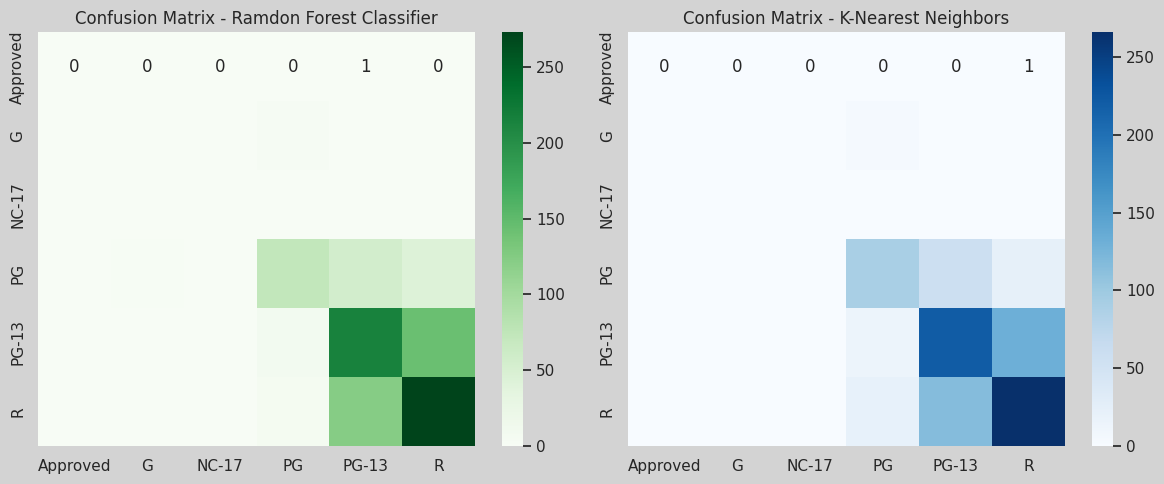

In [21]:
# Tính confusion matrix 
cm_frc = confusion_matrix(y_test, y_pred_rfc)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Biểu diễn ma trận bằng heatmap
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rfc, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Ramdon Forest Classifier')

plt.subplot(1, 2, 2)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - K-Nearest Neighbors')

plt.tight_layout()
plt.show()

### Đánh giá 
- Sau khi sử dụng Grid SearchCV để tinh chỉnh lại siêu tham số cho hai mô hình, độ hiệu quả đã được cải thiện.
- Cụ thể Accuracy đã tăng lên (RFC: 0.47 -> 0.59, KNN: 0.44 -> 0.61).
- So sánh các lớp ở cả hai mô hình đều có hiệu suất gần như nhau, nhưng nhìn vào Accuracy có thể thấy KNN lớn hơn RFC.

### Kết luận
- K-Nearest Neighbors là mô hình hiệu quả hơn để dự đoán mức độ ảnh hưởng của phân loại MPAA đến doanh thu phim.